Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations

2. Write code comments wherever required for code understanding
Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season


In [ ]:
# import urllib library
from urllib.request import urlopen
# import json library
import json  
#import datetime library
import datetime
import pandas as pd
from bs4 import BeautifulSoup
import pyspark
# importing sparksession from pyspark.sql module
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, max, min, avg, count, mean
import matplotlib.pyplot as plt


# Function to download and read data from link
def readDataJSON(url_link):
  
  try:
    # store the response of URL
    response = urlopen(url_link)
  except Exception as e:
    print("Could not open link")  
  
  try:
    # storing the JSON response from url in data
    data_json = json.loads(response.read())
  except Exception as e:
    print("Could not read data from link")
  
  try:
    # convert the json response
    convertData(data_json)
  except Exception as e:
    print("Could not convert data")

# Function to convert data in required format
def convertData(data):
  new_data = []

  try:
    
    for epi_data in data["_embedded"]["episodes"]:
      show_id = int(epi_data['id'])
      show_url = str(epi_data['url'])
      show_name = str(epi_data['name'])
      show_season = int(epi_data['season'])
      show_number = int(epi_data['number'])
      show_type = str(epi_data['type'])
      show_airdate = datetime.datetime.strptime(epi_data['airdate'],'%Y-%m-%d')
      show_airdate = datetime.datetime.strftime(show_airdate, '%Y-%m-%d')

      # convert time to 12h format
      try:
        hh, mm = epi_data['airtime'].split(":")
        hh = int(hh)

        if hh == 12:
          tm = 'PM'
        elif hh > 12:
          hh -= 12
          tm = 'PM'
        else:
          tm = 'AM'

        show_airtime = datetime.datetime.strptime(str(f'{hh}:{mm} {tm}'), '%I:%M %p')
        show_airtime = datetime.datetime.strftime(show_airtime,'%H:%M %p')
      except Exception as e:
        print("Could not convert Time")
      
      show_runtime = float(epi_data['runtime'])
      show_avg_rating = float(epi_data['rating']['average'])
      show_summary = BeautifulSoup(epi_data['summary'], "lxml").text
      
      show_med_img = str(epi_data["image"]["medium"])
      show_orig_img = str(epi_data["image"]["original"])

      new_data.append({
              'id': show_id,   
              'url': show_url,
              'name': show_name,
              'season': show_season,
              'number': show_number,
              'type': show_type,
              'airdate': show_airdate,
              'airtime': show_airtime,
              'runtime': show_runtime,
              'avg_rating': show_avg_rating,
              'summary': show_summary,
              'medium_img': show_med_img,
              'original_img': show_orig_img,
              })
      
      
      df = pd.DataFrame(new_data)

      try:
        # Create Excel file with formatted data
        df.to_csv("show_data.csv", index=False)
      except Exception as e:
        print("Could not save data in csv.")

  except Exception as e:
    print("Could not convert data")


readDataJSON("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")

In [ ]:
show_df = pd.read_csv("show_data.csv")

● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [ ]:
from numpy import dtype
sea_avg_rating = show_df.groupby('season')['season','avg_rating'].mean()
print(sea_avg_rating)

        season  avg_rating
season                    
1          1.0      8.0900
2          2.0      8.0000
3          3.0      7.7750
4          4.0      7.5375


<ipython-input-292-8387e6321e92>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sea_avg_rating = show_df.groupby('season')['season','avg_rating'].mean()


In [ ]:
# function to create plots
def createBarPlot(x,y,x_label, y_label, bar_title):
  plt.figure(figsize=(6, 4))
  plt.bar(x, y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(bar_title)
  plt.xticks(rotation=90)
  plt.show()

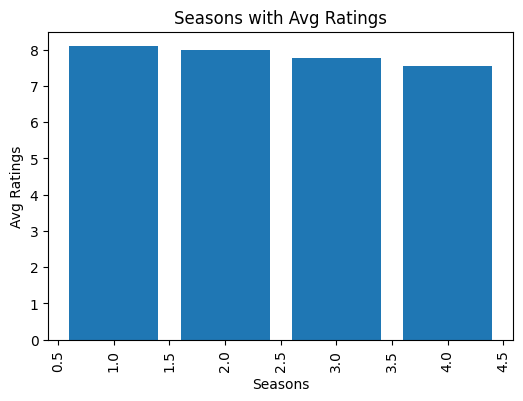

In [ ]:
# Bar plot for season with their avg rating
x = sea_avg_rating['season']
y = sea_avg_rating['avg_rating']
x_label = 'Seasons'
y_label = 'Avg Ratings'
bar_title = 'Seasons with Avg Ratings'
createBarPlot(x, y, x_label, y_label, bar_title)

● Get all the episode names, whose average rating is more than 8 for every season

In [ ]:
epi_avg_rate_gt_8 = show_df[show_df['avg_rating'] > 8][['name','avg_rating']]

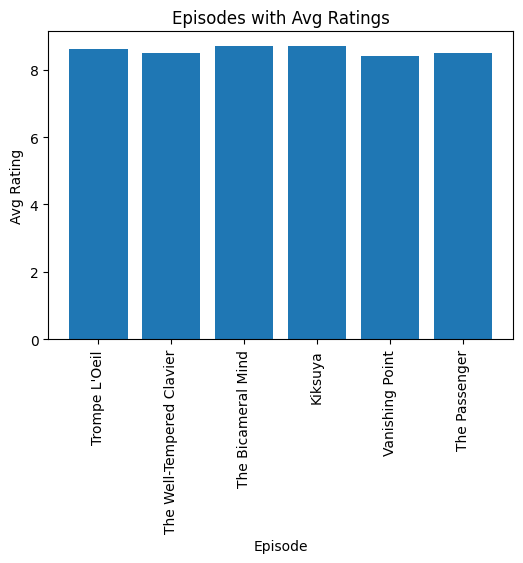

In [ ]:
# Bar plot for episodes with avg rating > 8
x = epi_avg_rate_gt_8['name']
y = epi_avg_rate_gt_8['avg_rating']
x_label = 'Episode'
y_label = 'Avg Rating'
bar_title = 'Episodes with Avg Ratings'
createBarPlot(x, y, x_label, y_label, bar_title)

● Get all the episode names that aired before May 2019

In [ ]:
epi_aired_bfr_may_2019 = show_df[show_df['airdate'] < '2019-05-01'] 

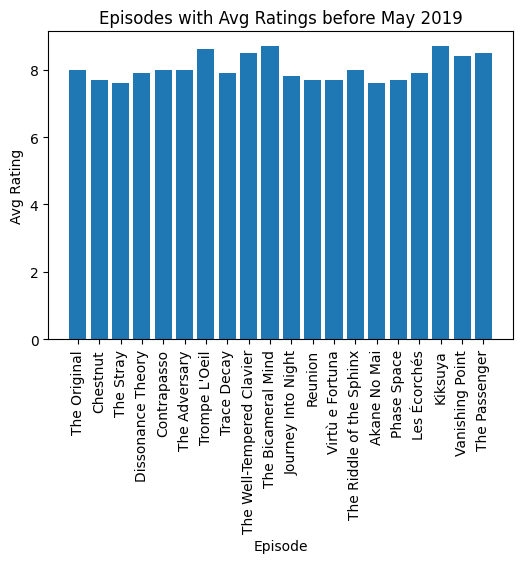

In [ ]:
# Bar plot for episodes with avg rating > 8
x = epi_aired_bfr_may_2019['name']
y = epi_aired_bfr_may_2019['avg_rating']
x_label = 'Episode'
y_label = 'Avg Rating'
bar_title = 'Episodes with Avg Ratings before May 2019'
createBarPlot(x, y, x_label, y_label, bar_title)

* Get the episode name from each season with the highest and lowest rating

In [ ]:
epi_high_rating = show_df.sort_values(by='avg_rating', ascending = False).groupby('season').first()
epi_high_rating[['name','avg_rating']]

,name,avg_rating
season,,
1,The Bicameral Mind,8.7
2,Kiksuya,8.7
3,The Mother of Exiles,8.0
4,Zhuangzi,7.8


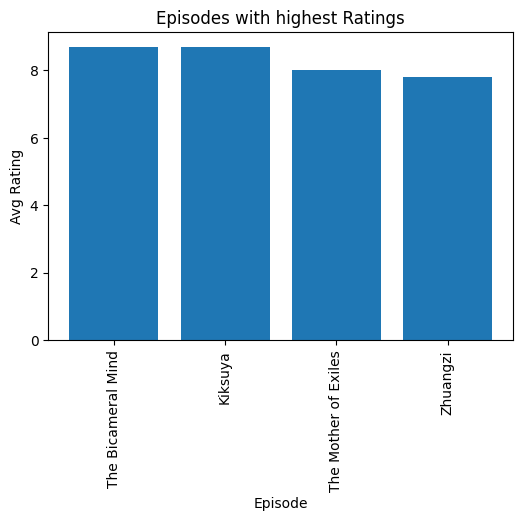

In [ ]:
# Bar plot for episodes with highest ratings
x = epi_high_rating['name']
y = epi_high_rating['avg_rating']
x_label = 'Episode'
y_label = 'Avg Rating'
bar_title = 'Episodes with highest Ratings'
createBarPlot(x, y, x_label, y_label, bar_title)

In [ ]:
epi_low_rating = show_df.sort_values(by='avg_rating', ascending = False).groupby('season').last()
epi_low_rating[['name','avg_rating']]

,name,avg_rating
season,,
1,The Stray,7.6
2,Akane No Mai,7.6
3,Decoherence,7.5
4,The Auguries,7.1


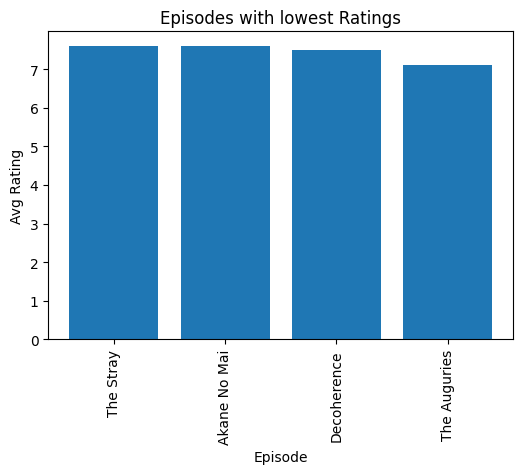

In [ ]:
# Bar plot for episodes with lowest ratings
x = epi_low_rating['name']
y = epi_low_rating['avg_rating']
x_label = 'Episode'
y_label = 'Avg Rating'
bar_title = 'Episodes with lowest Ratings'
createBarPlot(x, y, x_label, y_label, bar_title)

● Get the summary for the most popular ( ratings ) episode in every season

In [ ]:
epi_high_rating[['name','avg_rating','summary']]

,name,avg_rating,summary
season,,,
1,The Bicameral Mind,8.7,Delores finds out the truth about William's fa...
2,Kiksuya,8.7,Another of Westworld's Host revolutionaries is...
3,The Mother of Exiles,8.0,The truth doesn't always set you free.
4,Zhuangzi,7.8,God is bored.
